# 3. Exploratory Data Analysis

Before the discussion regarding the EDA Questions, the data shall be explored as on an as-is basis to see what do the following contents of the DataFrame show.

# EDA #1 Are there any outliers in the dataset and how do they impact the data?

In [61]:
# import modules here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [11]:
lap_times_df = pd.read_csv("lap_times.csv")
lap_times_df.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [13]:
# check data type
lap_times_df.dtypes

raceId           int64
driverId         int64
lap              int64
position         int64
time            object
milliseconds     int64
dtype: object

In [15]:
# convert ms to seconds for easier analysis
lap_times_df['laptime_in_seconds'] = lap_times_df['milliseconds'] / 1000
lap_times_df.head()

,raceId,driverId,lap,position,time,milliseconds,laptime_in_seconds
0,841,20,1,1,1:38.109,98109,98.109
1,841,20,2,1,1:33.006,93006,93.006
2,841,20,3,1,1:32.713,92713,92.713
3,841,20,4,1,1:32.803,92803,92.803
4,841,20,5,1,1:32.342,92342,92.342


In [17]:
# summary statistics of lap_times
laptime_stats = lap_times_df[['milliseconds', 'laptime_in_seconds']].describe()
laptime_stats

,milliseconds,laptime_in_seconds
count,5.890810e+05,589081.000000
mean,9.579945e+04,95.799445
std,7.639973e+04,76.399730
min,5.540400e+04,55.404000
25%,8.204100e+04,82.041000
50%,9.060800e+04,90.608000
75%,1.019300e+05,101.930000
max,7.507547e+06,7507.547000


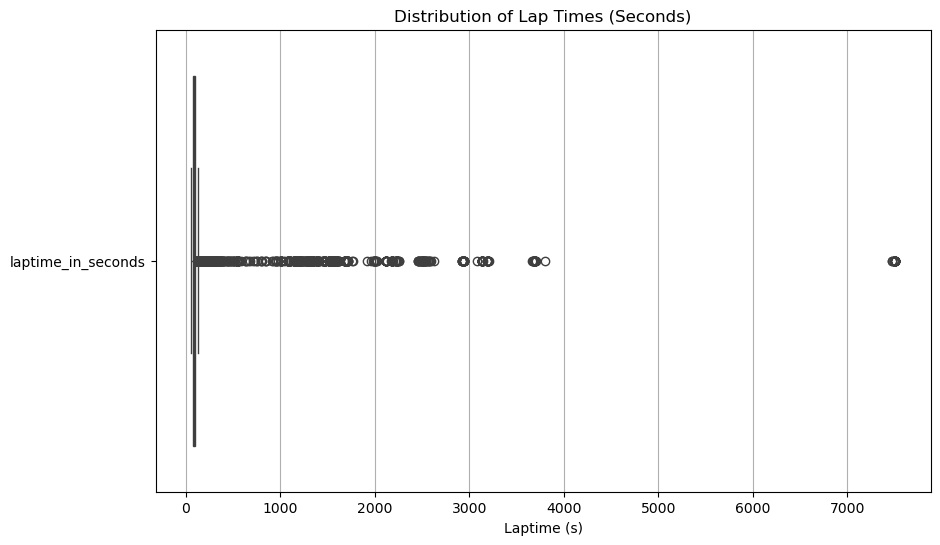

In [19]:
# visualization of lap times
plt.figure(figsize=(10, 6))
sns.boxplot(data=lap_times_df[['laptime_in_seconds']], orient='h')
plt.title('Distribution of Lap Times (Seconds)')
plt.xlabel('Laptime (s)')
plt.grid(axis='x')
plt.show()

The box plot reveals a significant outlier in the lap time data, with one lap recorded at 7,507 seconds (approximately 125 minutes or 2.08 hours). This far exceeds the typical range of 55 to 150 seconds, indicating a likely data recording error or an unusual race event. Possible explanations include sensor malfunctions, extended pit stops due to mechanical issues or penalties, or race interruptions such as red flags. For example, severe weather conditions, like those seen in the 2021 Belgian Grand Prix, can lead to prolonged delays that artificially inflate lap times.

From an analytical standpoint, this extreme value skews the data, making the mean lap time (95.8 seconds) appear higher than it should be. In contrast, the median lap time (90.6 seconds) offers a more reliable representation of typical performance. To ensure accurate analysis, this outlier should be flagged for further review or excluded if deemed an anomaly. Cross-referencing race reports or telemetry data can help determine whether it stems from a valid race incident or a data error.

For practical data cleaning, filtering out unrealistic lap times, such as those exceeding 1,000 seconds, can improve the accuracy of performance analysis. Introducing an outlier flag column allows systematic identification and investigation of anomalies. Additionally, analyzing specific races or drivers associated with these outliers could reveal underlying patterns, such as frequent mechanical failures or challenging track conditions.

In summary, while extreme lap times may occasionally reflect real but rare race scenarios, they are not representative of standard performance and must be handled carefully. By cleaning the data and contextualizing anomalies, the analysis becomes more reliable, ensuring that performance trends are accurately captured. If needed, further investigation into races or drivers linked to these outliers could provide deeper insights into their causes and potential impact on race strategy.

In [21]:
# pit stop time
pit_stops_df = pd.read_csv("pit_stops.csv")
pit_stops_df.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [22]:
# check data type
pit_stops_df.dtypes

raceId           int64
driverId         int64
stop             int64
lap              int64
time            object
duration        object
milliseconds     int64
dtype: object

In [26]:
# convert duration to float

non_numeric = pit_stops_df['duration'].apply(lambda x: not str(x).replace('.', '').isdigit())
print(pit_stops_df[non_numeric]['duration'].unique())

def safe_convert(x):
    try:
        return float(x)  # Try direct conversion first
    except ValueError:
        parts = list(map(float, x.split(':')))
        if len(parts) == 2:  # MM:SS.sss
            return parts[0] * 60 + parts[1]
        elif len(parts) == 3:  # HH:MM:SS.sss
            return parts[0] * 3600 + parts[1] * 60 + parts[2]
        else:
            return np.nan

pit_stops_df['duration_seconds'] = pit_stops_df['duration'].apply(safe_convert)

['16:44.718' '2:03.124' '1:29.401' '1:44.833' '1:14.026' '2:42.042'
 '1:13.009' '1:11.445' '1:49.329' '1:18.277' '1:06.065' '18:56.516'
 '18:57.295' '18:56.994' '18:56.594' '18:57.051' '18:55.520' '18:55.891'
 '18:56.054' '18:54.978' '18:55.276' '18:55.712' '18:54.529' '18:56.562'
 '18:55.797' '18:54.553' '18:53.680' '18:53.708' '18:53.381' '18:56.557'
 '18:55.937' '18:47.145' '18:33.851' '1:47.394' '1:11.178' '1:05.317'
 '18:09.312' '18:09.303' '18:09.365' '18:09.822' '18:09.372' '18:09.971'
 '18:10.087' '18:09.805' '18:09.417' '18:09.155' '18:08.989' '18:08.294'
 '18:07.311' '18:06.875' '18:04.466' '18:02.337' '18:02.140' '15:46.318'
 '1:32.609' '1:44.980' '1:27.084' '16:36.150' '16:38.401' '16:38.468'
 '16:38.234' '16:40.478' '16:40.664' '16:40.284' '16:40.466' '16:40.234'
 '16:39.366' '16:38.511' '16:38.328' '16:38.622' '16:38.546' '16:40.980'
 '16:41.198' '15:43.158' '13:30.454' '1:44.383' '1:03.680' '33:30.361'
 '33:29.747' '33:29.643' '33:28.504' '33:28.398' '33:28.828' '33:28.2

In [28]:
pitstop_stats = pit_stops_df[['lap', 'duration_seconds', 'milliseconds']].describe()
pitstop_stats

,lap,duration_seconds,milliseconds
count,11371.000000,11371.000000,1.137100e+04
mean,25.387389,85.230496,8.523050e+04
std,14.831497,310.427261,3.104273e+05
min,1.000000,12.897000,1.289700e+04
25%,13.000000,21.937500,2.193750e+04
50%,25.000000,23.606000,2.360600e+04
75%,36.000000,26.544000,2.654400e+04
max,78.000000,3069.017000,3.069017e+06


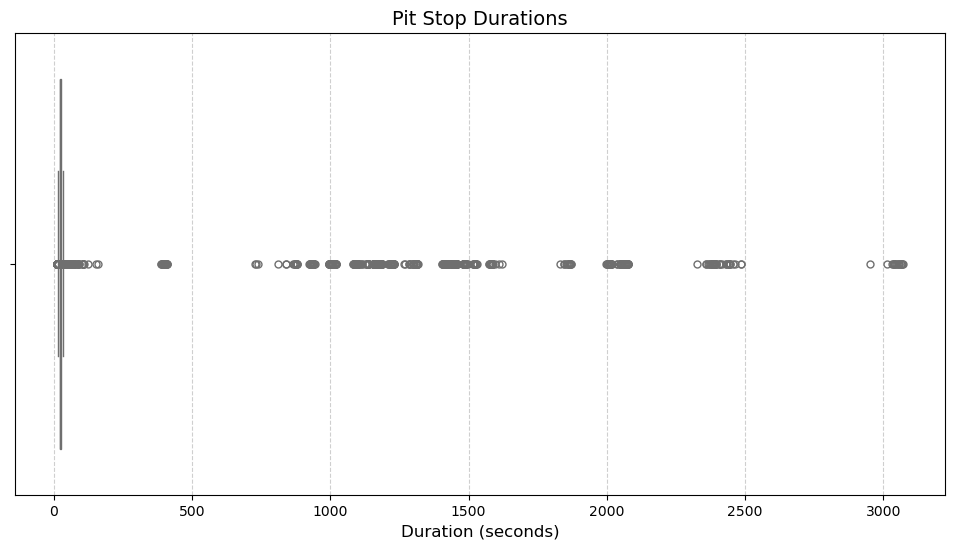

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=pit_stops_df['duration_seconds'], color='skyblue', fliersize=5)
plt.title('Pit Stop Durations', fontsize=14)
plt.xlabel('Duration (seconds)', fontsize=12)
plt.xticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In Formula 1, a typical pit stop lasts between 2 to 3 seconds, but occasionally, significantly longer stops occur due to a variety of factors. Mechanical failures, such as wheel gun malfunctions, stuck wheel nuts, or jack failures, can lead to unexpected delays in tire changes. Pit stop penalties, including 5 or 10-second stop-and-go penalties, also contribute to extended times, impacting a driver's race strategy. Additionally, damage repairs, such as front wing replacements or cooling overheated brakes, can add several seconds to a stop. Operational challenges and human errors, like miscommunication between the team and driver, last-minute pit calls, double-stacking teammates, or sensor malfunctions, can further extend pit stop durations.

From a data analysis perspective, these long-duration pit stops act as outliers, potentially skewing statistical interpretations. If these extreme values are included in calculations, they can inflate the average pit stop time, making a team's performance appear less efficient than it actually is. Furthermore, race strategies that rely on historical pit stop data could be misinformed if outliers are not properly accounted for, leading to suboptimal decision-making during a race. To ensure accurate analysis, these outliers should be carefully handled using appropriate statistical techniques, such as relying on the median instead of the mean, applying outlier trimming, or categorizing pit stops separately based on the cause of delay (e.g., penalties, mechanical failures, or damage repairs). By properly managing these anomalies, teams can gain a clearer understanding of true pit stop efficiency and make more informed strategic decisions to enhance overall race performance.

In [33]:
# qualifying

qualifying_df = pd.read_csv("qualifying.csv")
qualifying_df

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
10489,10547,1144,848,3,23,16,1:23.821,\N,\N
10490,10548,1144,855,15,24,17,1:23.880,\N,\N
10491,10549,1144,1,131,44,18,1:23.887,\N,\N
10492,10550,1144,861,3,43,19,1:23.912,\N,\N


In [35]:
qualifying_df.dtypes

qualifyId         int64
raceId            int64
driverId          int64
constructorId     int64
number            int64
position          int64
q1               object
q2               object
q3               object
dtype: object

In [37]:
qualifying_df.describe()

,qualifyId,raceId,driverId,constructorId,number,position
count,10494.000000,10494.000000,10494.000000,10494.000000,10494.000000,10494.000000
mean,5262.482847,624.600915,343.002287,47.918430,18.786449,11.195826
std,3046.588486,428.298147,389.586448,73.217993,18.447502,6.260374
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,2625.250000,160.000000,17.000000,4.000000,7.000000,6.000000
50%,5249.500000,870.000000,60.000000,9.000000,14.000000,11.000000
75%,7893.750000,1006.000000,822.000000,31.000000,22.000000,16.000000
max,10551.000000,1144.000000,862.000000,215.000000,99.000000,28.000000


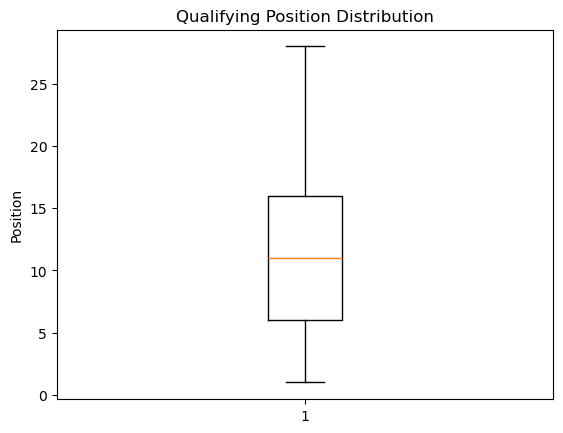

In [39]:
plt.boxplot(qualifying_df['position'])
plt.title('Qualifying Position Distribution')
plt.ylabel('Position')
plt.show()

The boxplot illustrates the distribution of qualifying positions in Formula 1, based on a dataset of 10,494 recorded qualifying results. The median qualifying position is around 11th place, meaning half of the drivers started in the top 11, while the other half qualified lower. Most qualifying positions fall between 6th and 16th place, but there are instances where drivers qualified as low as 28th, suggesting that at certain points in F1 history, up to 28 cars competed in qualifying. In modern Formula 1, qualifying follows a structured three-stage format. In Q1, all drivers compete, and the slowest five are eliminated, securing positions 16 to 20. In Q2, the remaining 15 drivers battle for a spot in the top 10, with another five being eliminated in positions 11 to 15. Finally, in Q3, the fastest 10 drivers compete for pole position and the highest spots on the grid. While today’s F1 grids typically feature 20 cars, historical data suggests larger fields were common in the past. Additionally, grid penalties and rule changes can influence starting positions. This analysis highlights how qualifying results have varied over time and provides insight into the evolution of F1’s competitive landscape.

In [42]:
# final position

results_df = pd.read_csv("results.csv")
results_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [44]:
results_df.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object

In [46]:
# convert position dtype to int
results_df['position'] = pd.to_numeric(results_df['position'], errors='coerce').astype('Int64')

results_df.describe()

,resultId,raceId,driverId,constructorId,grid,position,positionOrder,points,laps,statusId
count,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,15806.0,26759.000000,26759.000000,26759.000000,26759.000000
mean,13380.977391,551.687283,278.673530,50.180537,11.134796,8.020499,12.794051,1.987632,46.301768,17.224971
std,7726.134642,313.265036,282.703039,61.551498,7.202860,4.840796,7.665951,4.351209,29.496557,26.026104
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000
25%,6690.500000,300.000000,57.000000,6.000000,5.000000,4.0,6.000000,0.000000,23.000000,1.000000
50%,13380.000000,531.000000,172.000000,25.000000,11.000000,8.0,12.000000,0.000000,53.000000,10.000000
75%,20069.500000,811.000000,399.500000,63.000000,17.000000,11.0,18.000000,2.000000,66.000000,14.000000
max,26764.000000,1144.000000,862.000000,215.000000,34.000000,33.0,39.000000,50.000000,200.000000,141.000000


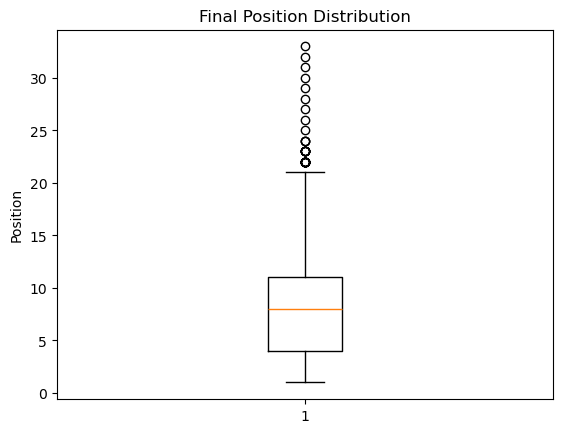

In [48]:
plt.boxplot(results_df['position'].dropna())
plt.title('Final Position Distribution')
plt.ylabel('Position')
plt.show()

In the early decades of Formula 1, race grids were significantly larger than they are today, with some events featuring up to 34 cars. This was largely due to the presence of privateer teams, which were independent entrants not officially backed by manufacturers, as well as the inclusion of races like the Indianapolis 500, which was part of the F1 calendar until 1960 and often had a higher number of participants. By the 1980s, pre-qualifying sessions were introduced to manage the growing number of entries, as more than 30 teams frequently attempted to qualify for a race. However, high attrition rates meant that many cars failed to finish, yet they were still classified in the final race results. Over time, the FIA introduced stricter entry regulations, capping the grid size at 26 in the 1990s and later reducing it to 20 cars in the 2010s, a structure that remains in place today. The modern F1 grid consists of 10 teams, each fielding two cars, ensuring a fixed 20-car lineup for every race. Additionally, advancements in car reliability have significantly reduced the number of retirements, meaning more cars complete races, leading to fewer classified positions overall. The historical presence of finishing positions up to 34 reflects an era of larger grids and frequent mechanical failures, whereas today’s structured regulations and technological improvements have streamlined race classifications to a more predictable format.

# EDA #3 How do performance metrics change across each race, and are there observable trends? (Pitstop and Laptime)

## Pit Stops

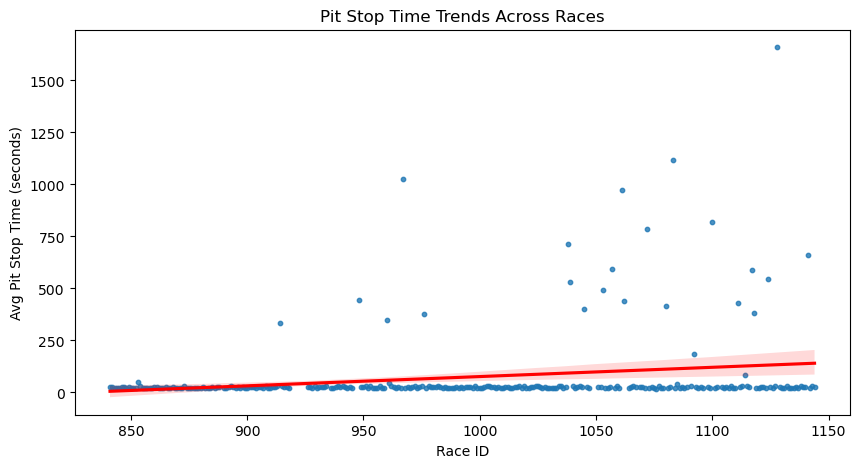

Pit stop times are getting slower.


In [67]:
# Group by race and compute mean pit stop duration
pit_stop_trend = pit_stops_df.groupby('raceId')['duration_seconds'].mean().reset_index()

# Plot trend
plt.figure(figsize=(10,5))
sns.regplot(x=pit_stop_trend['raceId'], y=pit_stop_trend['duration_seconds'], 
            scatter_kws={'s':10}, line_kws={'color':'red'})

plt.xlabel("Race ID")
plt.ylabel("Avg Pit Stop Time (seconds)")
plt.title("Pit Stop Time Trends Across Races")
plt.show()

# remove
# Check if pit stop times are improving
if pit_stop_trend['duration_seconds'].diff().mean() < 0:
    print("Pit stop times are improving (getting faster).")
else:
    print("Pit stop times are getting slower.")

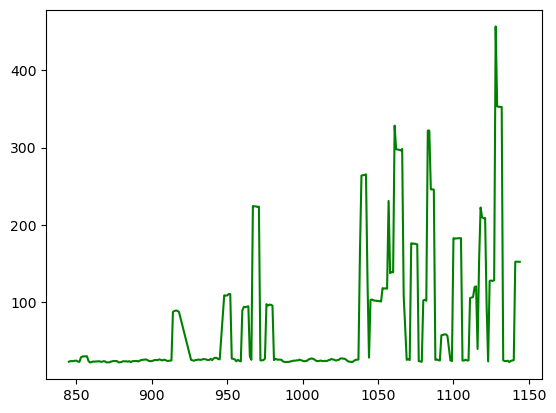

In [85]:
pit_stop_trend['rolling_avg'] = pit_stop_trend['duration_seconds'].rolling(window=5).mean()
plt.plot(pit_stop_trend['raceId'], pit_stop_trend['rolling_avg'], color='green', label="5-race Moving Avg")

Pit stop times in Formula 1 have undergone significant evolution, reflecting broader changes in the sport's technical and regulatory landscape. During the championship's early decades, pit stops were largely functional operations, often exceeding one minute as crews manually changed tires and refueled cars with basic equipment. The 1990s marked a turning point when teams began approaching pit stops with new professionalism, reducing average times to under ten seconds through specialized crew training and improved equipment.

The most dramatic acceleration occurred between 2010-2019, when pit stops transformed into high-speed operations. This period saw the introduction of advanced wheel gun technology, automated release systems, and optimized crew coordination, culminating in record sub-two-second stops. However, recent seasons have witnessed a measured reversal of this trend, with average pit stop times increasing to 3-5 seconds. This shift primarily results from regulatory interventions by the FIA, including mandatory sensor delay times and enhanced safety verification protocols implemented following several high-profile wheel retention incidents.

Technical developments have also contributed to this trend. The 2022 regulation changes introduced heavier 18-inch wheels and tires, which require more handling time during stops. While these modifications have slightly increased minimum stop durations, they represent Formula 1's ongoing effort to balance performance demands with essential safety considerations. Contemporary teams now emphasize procedural reliability and strategic optimization to compensate for these regulated time increases, demonstrating the sport's adaptive nature in maintaining competitive integrity while prioritizing participant safety.

## Lap Time

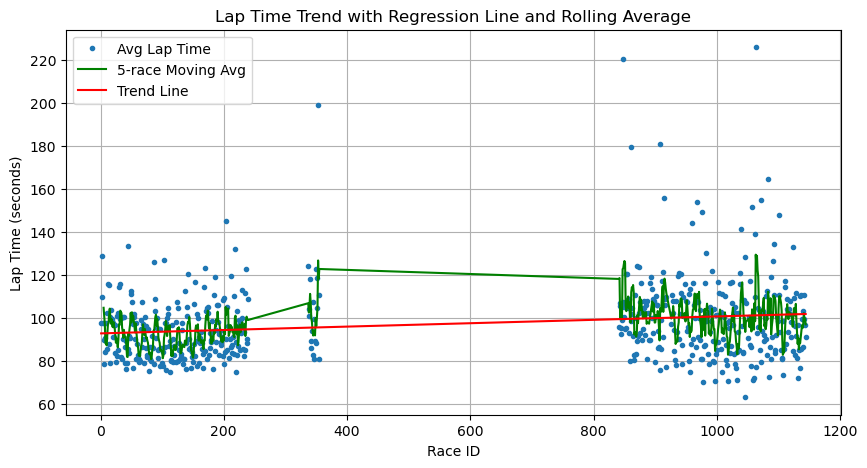

In [87]:
# Compute a rolling average for lap times 
race_lap_stats['rolling_avg'] = race_lap_stats['mean'].rolling(window=5).mean()

# Plot rolling average along with original data
plt.figure(figsize=(10, 5))
plt.plot(race_lap_stats.index, race_lap_stats['mean'], 'o', markersize=3, label="Avg Lap Time")
plt.plot(race_lap_stats.index, race_lap_stats['rolling_avg'], color='green', label="5-race Moving Avg")

# Regression trend line (already in your code)
plt.plot(race_lap_stats.index, intercept + slope * race_lap_stats.index, 'r', label="Trend Line")

# Labels and title
plt.xlabel("Race ID")
plt.ylabel("Lap Time (seconds)")
plt.title("Lap Time Trend with Regression Line and Rolling Average")
plt.legend()
plt.grid(True)
plt.show()

The analysis of lap times across multiple races shows a slight upward trend, meaning lap times are getting slightly slower over time rather than improving. While there are fluctuations—some races having much higher lap times than others—the overall trend doesn’t show a consistent decrease. This variation in performance can be influenced by several factors that impact lap times in Formula 1 (F1).

Lap times tend to increase due to things like wet weather, tire degradation, heavier fuel loads, mechanical issues, safety car periods, and changes in track conditions. On the other hand, lap times can decrease with better aerodynamics, fresh tires, a lighter fuel load as the race progresses, car upgrades, and smart race strategies like undercuts and DRS usage.

Looking at the data, there’s no clear indication that lap times are consistently improving across races. Instead, they seem to fluctuate based on various conditions. To get a clearer picture, it might help to analyze individual driver performance, track-specific conditions, or remove extreme outliers that could be skewing the results.

# EDA # 4 Do top-performing teams always have the highest-scoring drivers?

The Formula 1 Constructors' Championship in 2023 and 2024 saw dynamic performances from the top teams. A comparison of the results from both seasons shows consistent leaders and a notable shift in team rankings.

Highest Combined Points for 2023 and 2024:    

    1. Red Bull Racing 
    2. Ferrari 
    3. McLaren 
    4. Mercedes 

This combination of the results from both seasons highlights Red Bull's overall dominance across two years, despite McLaren's rise in 2024 and Ferrari's consistency (Formula 1, 2023; GPFans, 2024).

In [164]:
results_df = pd.read_csv("results.csv")
results_df = results_df[["raceId", "driverId", "constructorId", "points"]]

races_df = pd.read_csv("races.csv")
races_df = races_df[["raceId", "year"]]

races_results = pd.merge(results_df, races_df, on="raceId")
races_results.head()

constructor_df = pd.read_csv("constructors.csv")
constructor_df = constructor_df[["constructorId", "name"]]

races_results = pd.merge(races_results, constructor_df, on="constructorId")

# Filter races_results to include only records from 2023 and 2024
filtered_results = races_results[races_results['year'].isin([2023, 2024])]

team_points = filtered_results.groupby('name')['points'].sum().reset_index()
team_points = team_points.sort_values(by='points', ascending=False)

team_points.head(5)

,name,points
9,Red Bull,1327.0
4,Ferrari,958.0
6,McLaren,875.0
7,Mercedes,807.0
3,Aston Martin,360.0


In [162]:
drivers_df = pd.read_csv("drivers.csv")
drivers_df = drivers_df[["driverId", "forename", "surname"]]

driver_points = pd.merge(filtered_results, drivers_df, on="driverId")
driver_points['driver_name'] = driver_points['forename'] + ' ' + driver_points['surname']
driver_team_points = driver_points.groupby(['driver_name', 'name'])['points'].sum().reset_index()
driver_team_points = driver_team_points.sort_values(by='points', ascending=False)

driver_team_points.head(5)

,driver_name,name,points
19,Max Verstappen,Red Bull,929.0
14,Lando Norris,McLaren,528.0
2,Charles Leclerc,Ferrari,512.0
1,Carlos Sainz,Ferrari,440.0
15,Lewis Hamilton,Mercedes,424.0


When looking at the 2023 and 2024 Formula 1 seasons, we see a clear pattern: the best teams usually have the top-performing drivers. Red Bull's Max Verstappen is the perfect example - he's been crushing it in the standings while also powering his team to first place. Ferrari's strong second-place position makes sense too, with both Leclerc and Sainz consistently delivering solid results.

But here's where it gets interesting. McLaren's Lando Norris has been punching above his weight, scoring more points than some drivers from "better" teams like Ferrari and Mercedes. This shows that a truly talented driver can shine even without the absolute best car.

A couple important caveats: First, we're only looking at 2023-2024 - F1 changes fast. Teams improve or fall behind, and drivers switch seats (just look at Hamilton moving to Ferrari in 2025). Second, while driver skill matters a ton, the car's performance still sets the baseline - no amount of talent can win in a backmarker car.

The biggest takeaway is that over these two seasons, the fastest teams generally had the highest-scoring drivers, but standout talents like Norris prove there are always exceptions to the rule. It's this constant dance between machine and driver that makes F1 so fascinating to follow.